In [1]:
import numpy as np

We consider the unidimensional function $h:\mathbb{R}\to\mathbb{R}$, which is continuous and decreasing at 0. That is, there exists $\eta > 0$ such that $h(x) < h(0)$ for each $0 < x \leq \eta$.  And we are looking for a local minimum of $h$ in the interval, using only the values of the function. 

We first need to identify three points $a$, $b$ and $c$ such that $a < b < c$, $h(a) > h(b)$ and $h(c) > h(b)$. To do that, we consider $\delta$ such that $h(\delta) < h(0)$ and apply the following algorithm. Note that such a $\delta$ exists as the function is decreasing in  

In [2]:
def initLineSearch(h, delta, maxiter=100):
    """ 
    :param h: function that returns the value of h
    :type fct: f = h(x)
    
    :param delta: value such that h(delta) < h(0)
    :param delta: float.
    """
    
    left = 0
    hLeft = h(left)
    middle = delta
    hMiddle = h(middle)
    
    if hMiddle >= hLeft:
        raise ValueError(f'The condition {hMiddle} < {hLeft} is not verified.')
    right = 2 * delta
    hRight = h(right)
    iter = 0
    while hRight <= hMiddle:
        iter += 1
        if iter >= maxiter:
            raise RuntimeError(f'No suitable values have been found after {iter} iterations. The function may not be bounded from below')
        left = middle
        hLeft = hMiddle
        middle = right
        hMiddle = hRight
        right = 2.0 * right
        hRight = h(right)
    return(left, hLeft, middle, hMiddle, right, hRight) 

The quadratic interpolation considers the following candidate at each iteration: \\[x^+ =  \frac{1}{2} \frac{h(a)(b^2-c^2)+h(b)(c^2-a^2)+h(c)(a^2-b^2)}{h(a)(b-c)+h(b)(c-a)+h(c)(a-b)} \\]

In [3]:
def quadraticInterpolation(h, delta, eps):
    """
    :param h: function that returns the value of h
    :type fct: f = h(x)
    
    :param delta: value such that h(delta) < h(0)
    :type delta: float.

    :param eps: requested precision
    :type eps: float.
    """
    
    (a, ha, b, hb ,c , hc) = initLineSearch(h, delta)
    k = 1
    # We store the iterates for future display.
    iters = list()
    s1 = max(ha, hc) - hb
    s2 = c - a
    while s1 > eps and s2 > eps:
        numerator = ha * (b * b - c * c) + hb * (c * c - a * a) + hc * (a * a - b * b)
        denominator = ha * (b - c) + hb * (c - a) + hc * (a - b)
        xplus = 0.5 * numerator / denominator
        if xplus == b:
            # We introduce a perturbation to guarantee the property a < b < c
            if (b - a) < (c - b):
                xplus =  b + eps / 2.0
            else:
                xplus =  b - eps / 2.0
        hxplus = h(xplus)
        iters.append([a, b, c, xplus, ha, hb, hc, hxplus])
        if xplus > b:
            if hxplus > hb:
                # The new triplet is a, b, x+
                c = xplus
                hc = hxplus
            else:
                # The new triplet is b, x+, c
                a = b
                ha = hb
                b = xplus
                hb = hxplus
        else:
            if hxplus > hb:
                # The new triplet is x+, b c
                a = xplus
                ha = hxplus
            else:
                # The new triplet is a, x+, b
                c = b
                hc = hb
                b = xplus
                hb = hxplus
        s1 = max(ha, hc) - hb
        s2 = c - a
        k = k + 1
    iters.append([a, b, c, xplus, ha, hb, hc, hxplus])
    return b, iters

Consider the function \\[h(x)=(2+x) \cos(2+x).\\]

In order to identify a local minimum of $h$, we apply the quadratic interpolation algorithm with $\delta=6$ and $\varepsilon = 10^{-3}$.

(We use a high $\delta$ to get an example more illustrative).

In [4]:
def h(x):
    return (2.0 + x) * np.cos(2.0 + x)

In [5]:
xstar, iters = quadraticInterpolation(h, 6, 1.0e-3)
print('The optimal solution is ',xstar,' and there are ',len(iters),' iterations.')


The optimal solution is  7.529334397772614  and there are  14  iterations.


We now plot the interpolant for the first three iterations. On each plot, the function $h$ corresponds to the blue line and the interpolant $q$ to the yellow dashed line.

In [6]:
import matplotlib.pyplot as plt

def interpolant(abc):
    """
    :param iters: the list of iterations of the algorithm
    :type iters: list(tuple)
    
    :param iteration: iteration number
    """
    a, b, c, x, ha, hb, hc, hx = tuple(abc)
    Pa = ha / ((a - b) * (a - c))
    Pb = hb / ((b - a) * (b - c))
    Pc = hc / ((c - a) * (c - b))
    def q(x):
        return Pa * (x - b) * (x - c) + Pb * (x - a) * (x - c) + Pc * (x - a) * (x - b)
    return q

In [7]:
def plotIteration(iteration):
    abc = tuple(iters[iteration])
    q = interpolant(abc)
    a, b, c, x, ha, hb, hc, hx = tuple(abc)
    xrange = np.arange(0.0, 13.0, 0.001)
    plt.plot(xrange, h(xrange), '-', xrange, q(xrange), '--')
    shift = 0.2
    plt.annotate('a', xy = (a, ha), xytext = (a + shift, ha + 2 * shift))
    plt.annotate('b', xy = (b, hb), xytext = (b + shift, hb + 2 * shift))
    plt.annotate('c', xy = (c, hc), xytext = (c + shift, hc + 2 * shift))
    plt.annotate('x', xy = (x, hx), xytext = (x + shift, hx + 2 * shift))
    print(f'a={a:.2g} b={b:.2g} c={c:.2g} x={x:.2g}')
    xopt, yopt = [x, x], [q(x), h(x)]
    plt.xlim(0, 13)
    plt.ylim(-20, 20)
    plt.plot(xopt, yopt)
    plt.show()

a=0 b=6 c=12 x=3.6


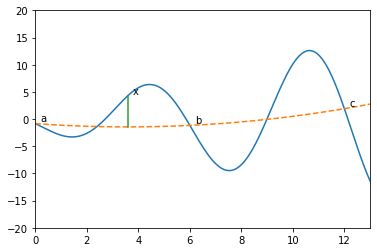

In [8]:
plotIteration(0)

a=3.6 b=6 c=12 x=8.2


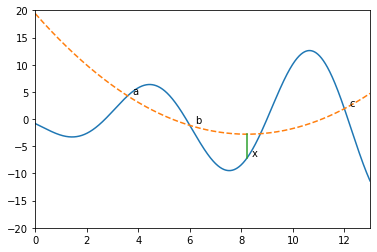

In [9]:
plotIteration(1)

a=6 b=8.2 c=12 x=8.7


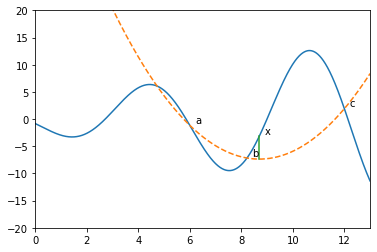

In [10]:
plotIteration(2)

a=6 b=8.2 c=8.7 x=7.4


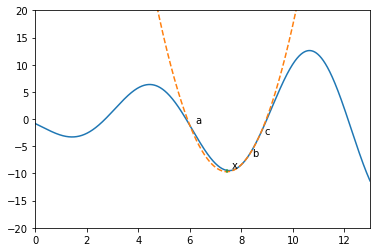

In [11]:
plotIteration(3)